In [1]:
import pandas as pd
import ast
import Functions as fc
import pymysql
from sqlalchemy import create_engine
from sqlalchemy import text
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
from collections import defaultdict

# First Step: Uploading Dataframe

In [2]:
df = fc.load_book_details()

# Second Step: Creating Database:


**First, we will create three subtables derived from the original DataFrame: Books_df, Authors_df, and Formats_df.**

In [3]:
books_df, authors_df, formats_df = fc.create_subtables(df)

**2.1: Formatting the Format table:**  We first will make sure that there are two separate columns for the number of pages and the format itself. We then will turn the number of pages into integers

In [4]:
formats_df = fc.format_format_table(formats_df)
formats_df

,format_id,num_pages,book_format
0,1,652,Paperback
1,2,912,Paperback
2,3,309,Hardcover
3,4,435,Mass Market Paperback
4,5,734,Paperback
...,...,...,...
3099,3100,220,Kindle Edition
3100,3101,86,Kindle Edition
3101,3102,119,Kindle Edition
3102,3103,776,Kindle Edition


**2.2: Formatting the Books table:**  Making sure that there are no duplicates, and that all foreign keys in Books_df are linked to a primary key in Formats_df

In [5]:
books_df = fc.format_books_table(books_df, formats_df)
books_df

The following format_id values in books_df do not exist in formats_df:
       format_id
186          161
432          325
579          408
3427        1287
3507        1300
5620        1633
7303        1831
7496        1846
8596        1959
8683        1966
9113        2012
10141       2121
10435       2153
10637       2175
10646       2176
11987       2349
12150       2370
12394       2428
12784       2506
13952       2761
15003       2944
15950       3067
Total number of invalid format_id values in books_df: 221


,book_id,book_title,book_details,publication_info,num_ratings,num_reviews,average_rating,rating_distribution,author_id,format_id
0,1,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['First published July 16, 2005']",3292516,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8...",1,1
1,2,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['First published June 21, 2003']",3401709,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2...",1,2
2,3,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"['First published June 26, 1997']",10116247,163493,4.47,"{'5': '6,544,542', '4': '2,348,390', '3': '856...",1,3
3,5,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","['First published July 8, 1999']",4215031,84959,4.58,"{'5': '2,892,322', '4': '970,190', '3': '287,7...",1,4
4,6,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"['First published July 8, 2000']",3718209,69961,4.57,"{'5': '2,500,070', '4': '899,496', '3': '259,7...",1,5
...,...,...,...,...,...,...,...,...,...,...
16220,208877606,Finistère,The 1920s. When wealthy American adolescent Ma...,"['First published January 1, 1951']",129,22,3.77,"{'5': '36', '4': '41', '3': '41', '2': '8', '1...",7613,902
16221,208877648,The Descent,"Set in the 1950s, The Descent asks the questio...","['First published January 1, 1952']",4,0,4.75,"{'5': '3', '4': '1', '3': '0', '2': '0', '1': ...",7613,332
16222,209251042,FDR Unmasked: 73 Years of Medical Cover-ups Th...,THE HIDDEN ILLNESSES THAT SHAPED FDR’S LIFE AN...,"['Published February 27, 2024']",986,11,4.32,"{'5': '469', '4': '431', '3': '38', '2': '33',...",7614,902
16223,209441121,Code Yellow in Gretna Green,"In Gateway terminology, a ""Code Yellow"" signif...","['Published March 28, 2024']",1109,106,4.61,"{'5': '764', '4': '266', '3': '74', '2': '4', ...",7615,3103


**2.3: Creating and formatting the genres_df subtable:** 

In [6]:
genres_df = fc.format_genres_table(df)
genres_df

,genre,genre_id
0,"Fantasy, Young Adult, Fiction, Magic, Children...",1
1,"Young Adult, Fiction, Magic, Childrens, Audiob...",2
2,"Fantasy, Fiction, Young Adult, Magic, Children...",3
3,"Fantasy, Young Adult, Fiction, Magic, Children...",4
4,"Fantasy, Young Adult, Fiction, Magic, Adventur...",5
...,...,...
13768,"Fantasy, Science Fiction Fantasy, Adventure, H...",13769
13769,"Science Fiction Fantasy, Fantasy, Novels, Fict...",13770
13770,"Fiction, LGBT, Queer, Classics, Gay, Gay Ficti...",13771
13771,"Science Fiction Fantasy, Fantasy, Fiction, Epi...",13772


**2.4: Creating and formatting the book_genres_df** 

In [7]:
book_genres_df = fc.create_book_genres_table(df, genres_df)
book_genres_df

,book_id,genre_id
0,1,NaN
1,2,NaN
2,3,NaN
3,5,NaN
4,6,NaN
...,...,...
16220,208877606,NaN
16221,208877648,NaN
16222,209251042,NaN
16223,209441121,NaN


**2.1: Creating and formatting the Ratings table:** We will create five different columns for each star that can be given the book. The values of each column will be the number of reviews that have given the book that amount of stars.

In [8]:

ratings_df = fc.create_ratings_table(df)
ratings_df

,book_id,5_star_reviews,4_star_reviews,3_star_reviews,2_star_reviews,1_star_reviews
0,1,2244154,775028,219864,35870,17600
1,2,2178760,856178,293293,51763,21715
2,3,6544542,2348390,856996,194791,171528
3,5,2892322,970190,287733,40587,24199
4,6,2500070,899496,259745,38301,20597
...,...,...,...,...,...,...
16220,208877606,36,41,41,8,3
16221,208877648,3,1,0,0,0
16222,209251042,469,431,38,33,15
16223,209441121,764,266,74,4,1


# Third Step: Analyzing Data With MySQL

**3.1: Loading MySQL Database**

In [9]:
engine = fc.create_db_engine()


**3.2: Analyzing Data**

1. Which books have the highest number of 5-star reviews?

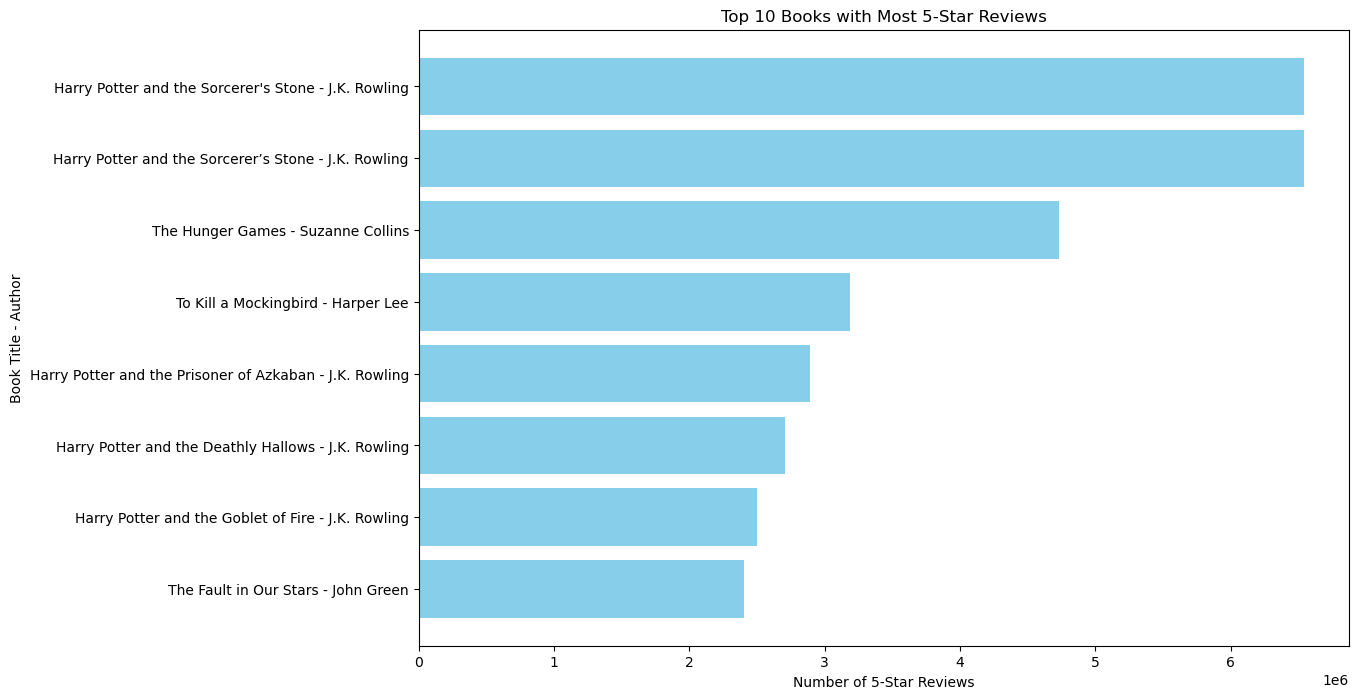

In [10]:
fc.plot_top_10_books_5_stars(engine)

2. Which books have high average ratings but a low number of reviews (less than 100)?

/Users/pepdemartiolius/Documents/GitHub/Final-Project/Functions.py:363: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_rating', y='book_title', data=top_10_books, palette='viridis')


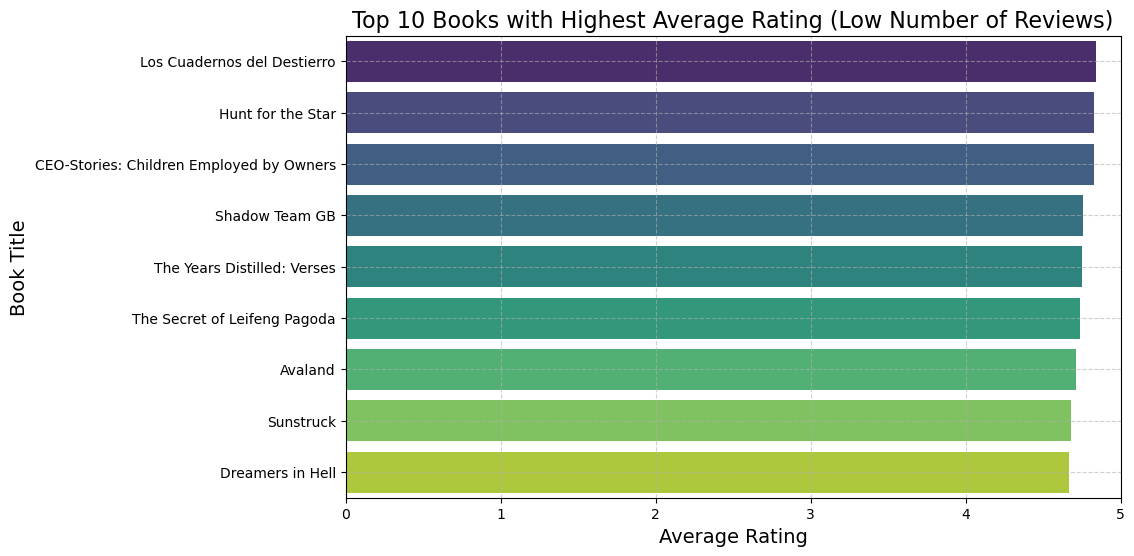

In [11]:
fc.plot_top_10_highest_rated_books(engine)

3. Which authors have the most books with high ratings?

/Users/pepdemartiolius/Documents/GitHub/Final-Project/Functions.py:407: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Rating', y='author', data=top_10_authors, palette='plasma')


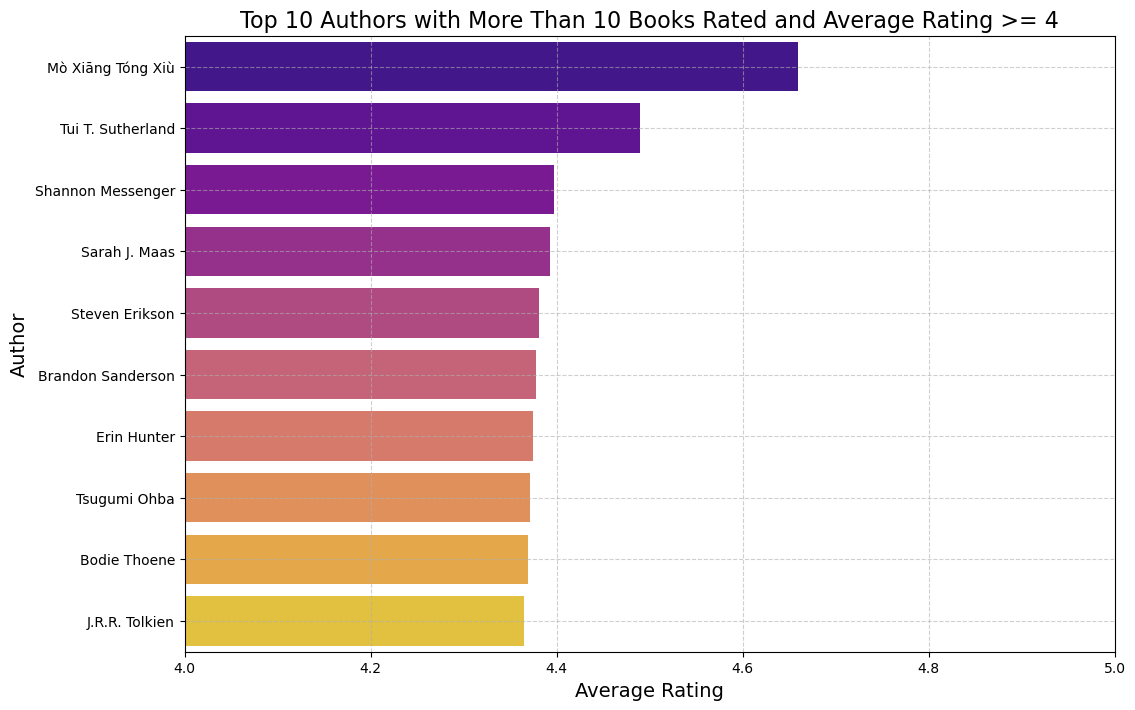

In [12]:
fc.plot_top_10_best_authors(engine)

4. Which formats are the most in-demand (e.g., hardcover, paperback)?

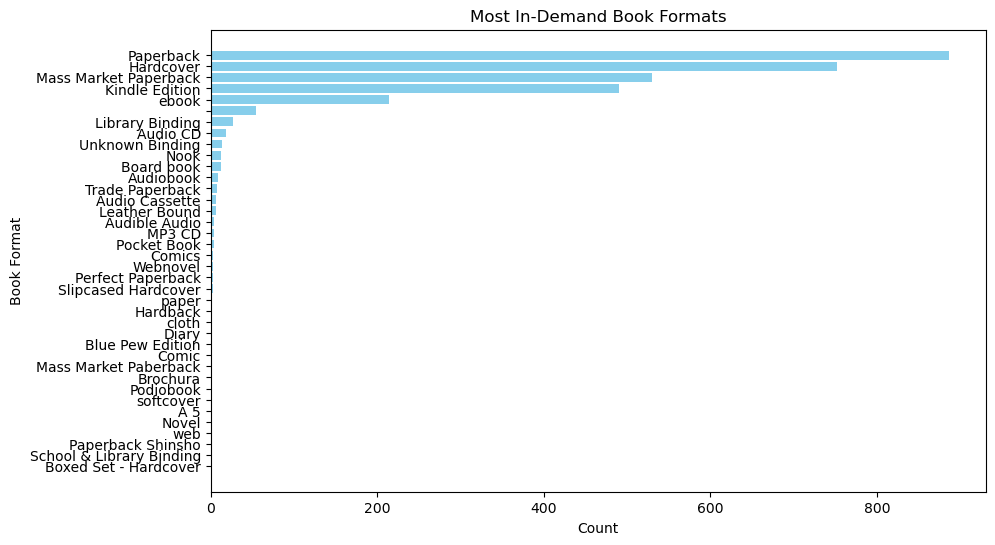

In [13]:
fc.plot_most_in_demand_book_formats(engine)

5. Which genres are the most popular among the highest-rated books?

/Users/pepdemartiolius/Documents/GitHub/Final-Project/Functions.py:509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_genres_clean.sort_values(by="Avg_Rating", ascending=False, inplace=True)


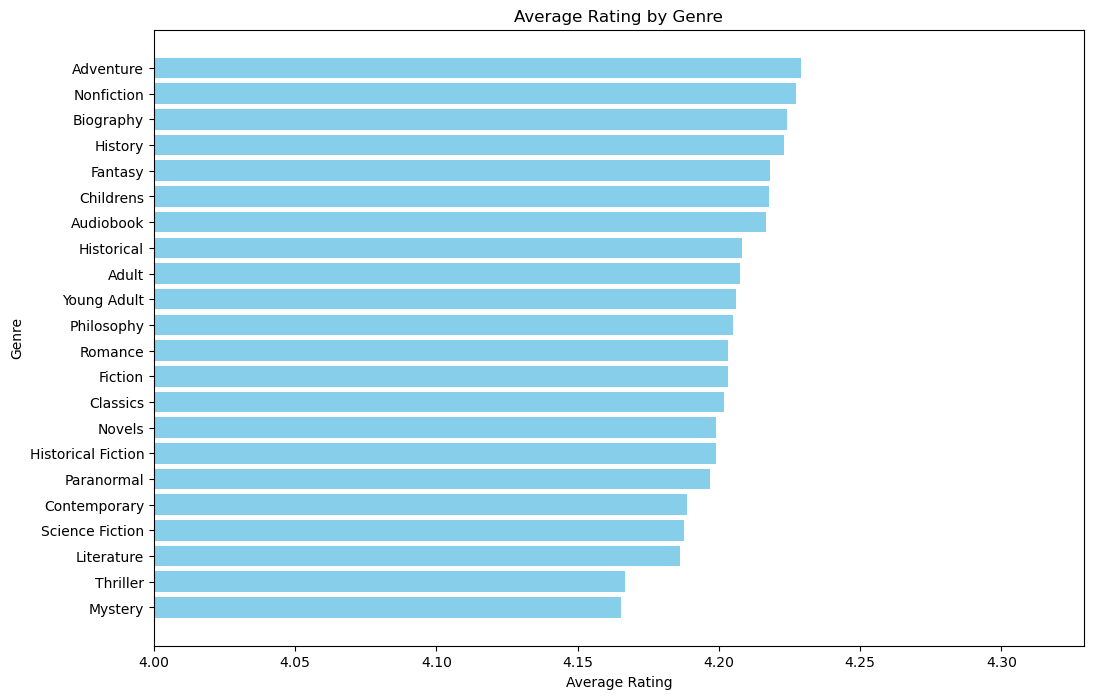

In [14]:
fc.plot_avg_rating_by_genre(engine)

6. Which genres have the highest number of reviews?

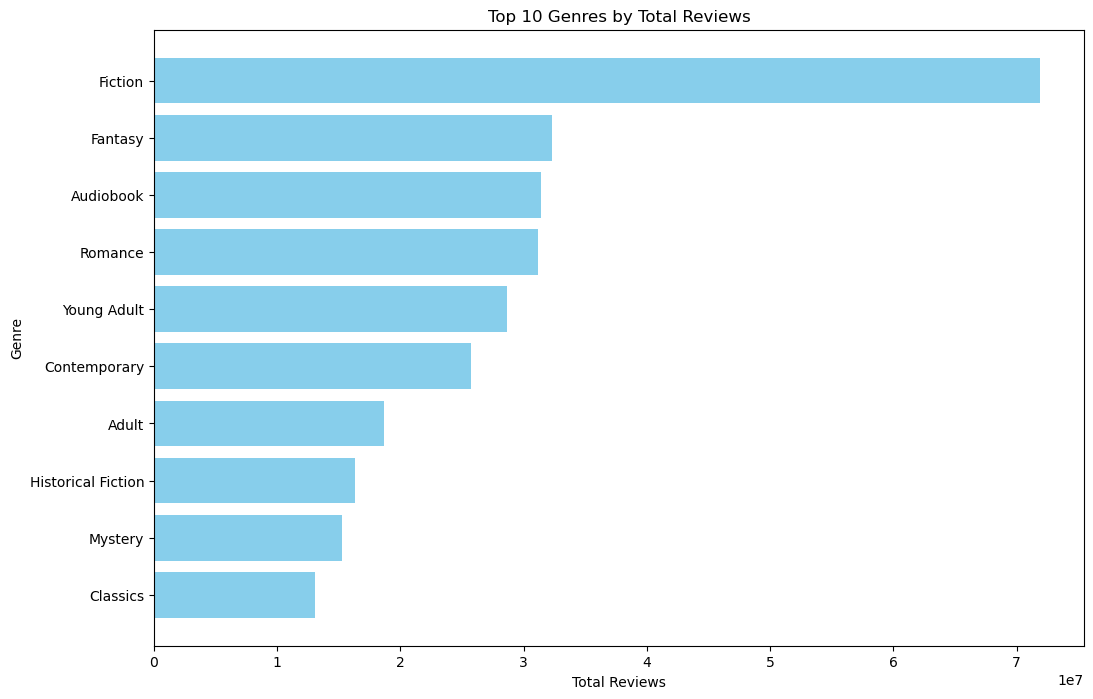

In [15]:
fc.plot_top_10_genres_by_reviews(engine)

7. Do the number of pages correlate with the Average Rating of the book?

The correlation between Number of Pages and Average Rating is: 0.5313


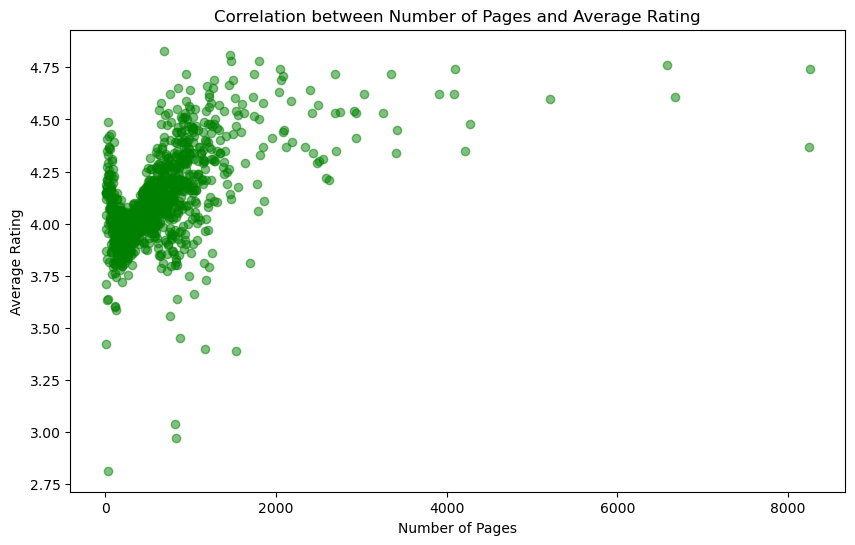

In [16]:
fc.plot_correlation_num_pages_avg_rating(engine)

8. Which books have the highest average rating?

In [17]:
fc.plot_top_10_books_by_avg_rating

<function Functions.plot_top_10_books_by_avg_rating(engine)>